#  Customer Segmentation Project

Problem Statement:

An e-commerce company has a variety of customers. Every customer has a different set of tastes and 
interests and may belong to different financial levels. Therefore, it is a heavy challenge for the marketing 
and strategy team to decide what products it should be promoting or what kind of campaigns will lead 
to the most lucrative results. 
Spending score is one such metric through which you can segregate customers. Spending score is not 
just determined by the financial situation, but it is also based on other factors such as customer 
behavior, the kind of products a customer buys, etc. 
In this project, your marketing team basically wants you to identify the customers who will most easily 
converge and buy products. In doing so, you must show the different segments in percentage and also 
predict the kind of products and marketing campaigns that will be the most successful with your 
customers. 


# 1. Data Preparation

Load all modules that would be utilized in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings
%matplotlib inline

In [2]:
# Load and read the dataset
database= pd.read_excel("Online Retail.xlsx",  dtype={'CustomerID': str,'InvoiceNo': str})


In [3]:
database.info()  #to check the data type and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
database.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### This dataframe contains 8 variables that correspond to:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides ##### 

In [13]:
database.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [15]:
database.shape  #to check the number of rows and columns

(541909, 8)

In [5]:
database.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# we can see a lot of CustomerID is missing

To get info on columns types and number of null values

In [7]:
pd.DataFrame(database.isnull().sum()/database.shape[0]*100).T.rename(index={0:'null values (%)'})

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


there is almost 25% data missing in CustomerID so we can drop those rows
because we it would not be a good idea to replace it using imputation.

In [8]:
# drop the missing rows from CustomerID
database.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [9]:
database.shape

(406829, 8)

In [10]:
database

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [11]:
database.isnull().sum() 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [31]:
database.drop_duplicates(inplace = True) ##drop the duplicate rows

In [33]:
database.shape

(401604, 9)

In [12]:
# No missing data in rows now

In [34]:
len(database['Country'].unique())  #total number of different countries in the dataset

37

In [35]:
database["Country"].value_counts() #to check which country has maximum data in the dataset

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [15]:
#Explore the unique values of each attribute

In [36]:
pd.DataFrame([{'products': len(database['StockCode'].value_counts()),    
               'transactions': len(database['InvoiceNo'].value_counts()),
               'customers': len(database['CustomerID'].value_counts()),}], 
              index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


In [37]:
#another method to cross-check
print("Total unique Invoice: ", database['InvoiceNo'].nunique())
print("Total unique Stock: ",database['StockCode'].nunique())
print("Total unique CustomerID:", database['CustomerID'].nunique() )

Total unique Invoice:  22190
Total unique Stock:  3684
Total unique CustomerID: 4372


# Feature Engineering 

# RFM Analysis

#### RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
#### RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

##### RECENCY (R): Days since last purchase

##### FREQUENCY (F): Total number of purchases

##### MONETARY VALUE (M): Total money this customer spent.

# Recency

In [38]:
#last date available in our dataset to use as a refrence
database['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [39]:
max_date = datetime.date(2011,12,9)
print(max_date)

2011-12-09


In [40]:
#creating a new column date which contains the date of invoice only
database['date'] = database['InvoiceDate'].dt.date

In [41]:
database.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01


In [42]:
#group by customers and check last date of purshace
recency_df = database.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastVisitOn']

In [43]:
recency_df.head()

,CustomerID,LastVisitOn
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [24]:
# No. of days since last purchase made in Recency column

In [44]:
recency_df['Recency'] = recency_df['LastVisitOn'].apply(lambda x: (max_date - x).days)

In [45]:
recency_df

,CustomerID,LastVisitOn,Recency
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310
...,...,...,...
4367,18280,2011-03-07,277
4368,18281,2011-06-12,180
4369,18282,2011-12-02,7
4370,18283,2011-12-06,3


In [46]:
recency_df.drop('LastVisitOn',axis=1,inplace=True)

In [47]:
recency_df

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


# Frequency 
###### how many times customer used our facility

In [48]:
#drop duplicates
df=database.copy()

In [49]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09


In [50]:
#calculate frequency of purchases
frequency = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


# Monetary Value: 

#### What is the average business value (revenue) generated by each engagement.

In [57]:
#create column total cost
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34,20.34


In [59]:
df_monetary = df.groupby(by='CustomerID',as_index=False)['Total_Cost'].sum()
df_monetary.columns = ['CustomerID','Monetary']
df_monetary.head()
#monetry value of zero means that some orders were cancelled also 'C'

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


# RMF table 

#### Merge recency dataframe with frequency dataframe and then that with monetary table


In [65]:
df1 = recency_df.merge(frequency,on='CustomerID')
df_rfm = df1.merge(df_monetary,on='CustomerID')
#CustomerID as index
#df_rfm.set_index('CustomerID',inplace=True)
df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40
...,...,...,...,...
4367,18280,277,10,180.60
4368,18281,180,7,80.82
4369,18282,7,13,176.60
4370,18283,3,721,2045.53


In [66]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.581199,91.858188,1893.531433
std,100.772139,229.223566,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,17.000000,291.795000
50%,50.000000,41.000000,644.070000
75%,143.000000,99.250000,1608.335000
max,373.000000,7812.000000,279489.020000


#### We know that high recency( gap of days from max_date to last visit) is bad, 
#### but high Frequency, Monetary value is good

Ranking Customer’s based upon their recency, frequency, and monetary score

Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [67]:
finaldf=df_rfm.copy()
df_rfm['R_rank'] = df_rfm['Recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['Frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['Monetary'].rank()

# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100
 
df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346,325,2,0.00,3.881934,2.493138,2.493138
1,12347,2,182,4310.00,95.807971,88.129003,88.129003
2,12348,75,31,1797.24,37.728265,42.074565,42.074565
3,12349,18,73,1757.55,72.987252,66.720037,66.720037
4,12350,310,17,334.40,5.466866,24.794145,24.794145


#### Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score 

this RFM score can be changed according to business need.

In [180]:

df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 *df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm[['CustomerID', 'RFM_Score']].head()


,CustomerID,RFM_Score
0,12346,0.13
1,12347,4.46
2,12348,2.07
3,12349,3.38
4,12350,1.09


### Rating Customer based upon the RFM score
#### rfm score >4.5 : Top Customer
#### 4.5 > rfm score > 4 : High Value Customer
#### 4>rfm score >3 : Medium value customer
#### 3>rfm score>1.6 : Low-value customer
#### rfm score<1.6 :Lost Customer

In [170]:

df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        df_rfm['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    df_rfm['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(df_rfm['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df_rfm[['CustomerID', 'RFM_Score', 'Customer_segment']].head(15)

,CustomerID,RFM_Score,Customer_segment
0,12346,0.13,Lost Customers
1,12347,4.46,High value Customer
2,12348,2.07,Low Value Customers
3,12349,3.38,Medium Value Customer
4,12350,1.09,Lost Customers
5,12352,3.55,Medium Value Customer
6,12353,0.34,Lost Customers
7,12354,2.66,Low Value Customers
8,12355,0.93,Lost Customers
9,12356,3.10,Medium Value Customer


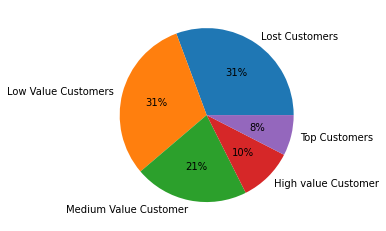

In [171]:
plt.pie(df_rfm.Customer_segment.value_counts(),
        labels=df_rfm.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [184]:
finaldf.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40


Recency: 


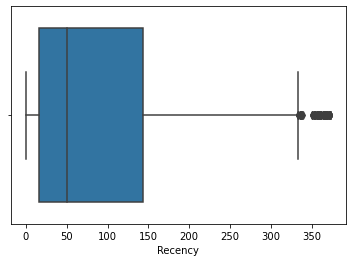

Frequency: 


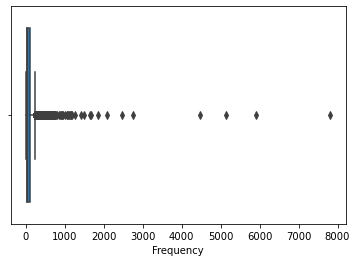

Monetary: 


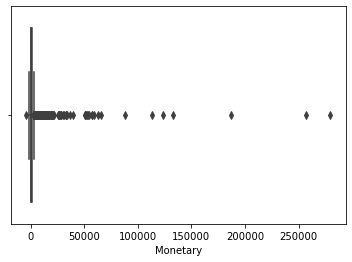

In [99]:
list1 = ['Recency','Frequency','Monetary']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [187]:
finaldf[['Recency','Frequency','Monetary']]

,Recency,Frequency,Monetary
0,325,2,0.00
1,2,182,4310.00
2,75,31,1797.24
3,18,73,1757.55
4,310,17,334.40
...,...,...,...
4367,277,10,180.60
4368,180,7,80.82
4369,7,13,176.60
4370,3,721,2045.53


In [104]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['Recency','Frequency','Monetary']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [105]:
new_df

,Recency,Frequency,Monetary
0,325,2,0.00
1,2,182,4310.00
2,75,31,1797.24
3,18,73,1757.55
4,310,17,334.40
...,...,...,...
4367,277,10,180.60
4368,180,7,80.82
4369,7,13,176.60
4370,3,721,2045.53


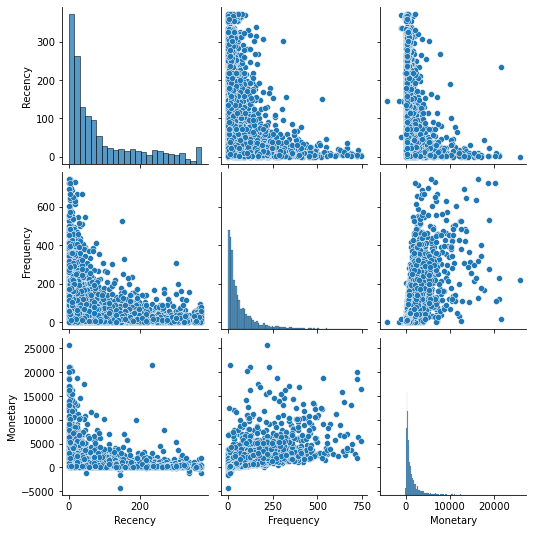

In [111]:
# pairplot
sns.pairplot(new_df)
# to show
plt.show()

In [101]:
from pandas_profiling import ProfileReport

C:\Users\DELL\AppData\Local\Temp\ipykernel_17652\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Standardization

In [72]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates() #did before also 
col_names = ['Recency','Frequency','Monetary']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [73]:
scaled_features

,Recency,Frequency,Monetary
0,2.302839,-0.743958,-0.633485
1,-0.897436,1.011191,1.371189
2,-0.174154,-0.461184,0.202450
3,-0.738909,-0.051649,0.183989
4,2.154219,-0.597696,-0.477949
...,...,...,...
4316,1.827256,-0.665952,-0.549484
4317,0.866183,-0.695204,-0.595894
4318,-0.847896,-0.636699,-0.551345
4319,-0.887528,6.266888,0.317935


Text(0, 0.5, 'Inertia')

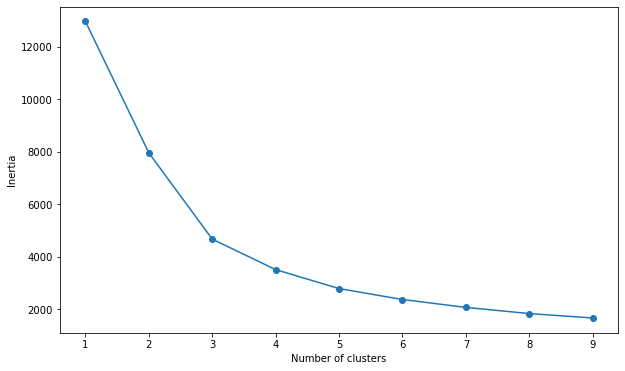

In [116]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [112]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [96]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.5174489084385289


In [90]:
# for model with 3 clusters
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(scaled_features)
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.5179886176344768


##### The silhouette coefficient of this model is 0.518, indicating reasonable cluster separation.

In [113]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [114]:
frame.head(10)

,Recency,Frequency,Monetary,cluster
0,325,2,0.00,0
1,2,182,4310.00,3
2,75,31,1797.24,2
3,18,73,1757.55,2
4,310,17,334.40,0
5,36,95,1545.41,2
6,204,4,89.00,0
7,232,58,1079.40,0
8,214,13,459.40,0
9,22,59,2811.43,2


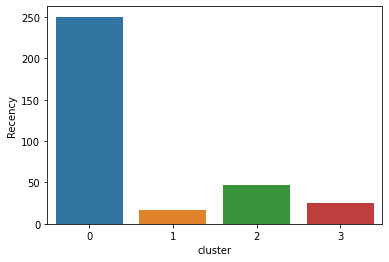

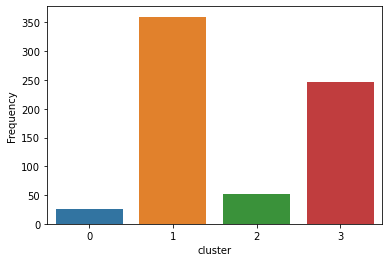

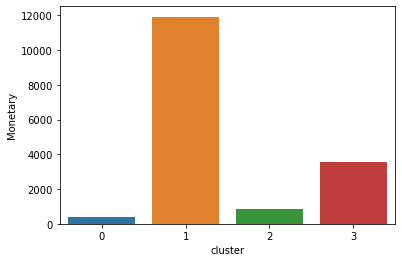

In [115]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [107]:
ProfileReport(frame)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]